In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    "Compute r."
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    "The slope of the regression line (original units)"
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    "The intercept of the regression line (original units)"
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

## Regression Model

In [3]:
np.random.normal()

0.09863710448031211

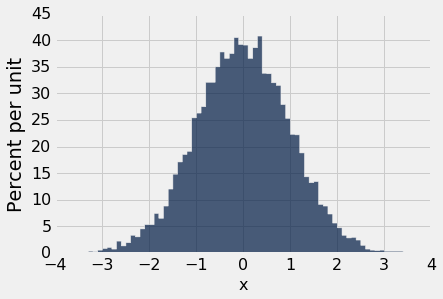

In [4]:
samples = Table('x')
for i in np.arange(10000):
    samples.append([np.random.normal()])
samples.hist(0, bins=np.arange(-4, 4, 0.1))

In [5]:
def signal_and_noise(x, r):
    return r * x + np.random.normal() * (1-r**2)**0.5

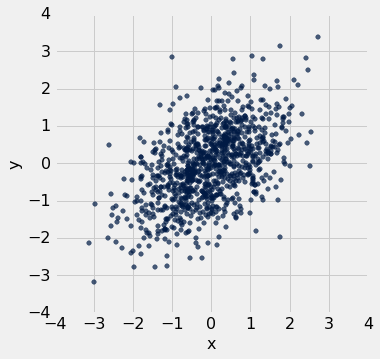

In [6]:
def regression_model(r, sample_size):
    pairs = Table(['x', 'y'])
    for i in np.arange(sample_size):
        x = np.random.normal()
        y = signal_and_noise(x, r)
        pairs.append([x, y])
    return pairs

regression_model(1/2, 1000).scatter('x', 'y')

The true r is  0.5  and the estimated r is  0.49559427019


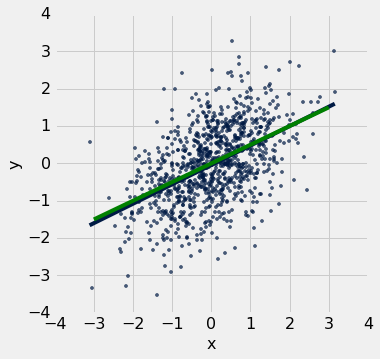

In [7]:
def compare(true_r, sample_size):
    pairs = regression_model(true_r, sample_size)
    estimated_r = correlation(pairs, 'x', 'y')
    pairs.scatter('x', 'y', fit_line=True, s=10)
    plt.plot([-3, 3], [-3 * true_r, 3 * true_r], color='g', lw=4)
    print("The true r is ", true_r, " and the estimated r is ", estimated_r)

compare(0.5, 1000)

The true r is  0.5  and the estimated r is  0.350536509733


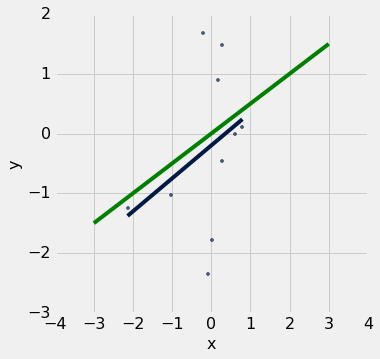

In [8]:
compare(0.5, 10)

The true r is  0.9  and the estimated r is  0.951433588418


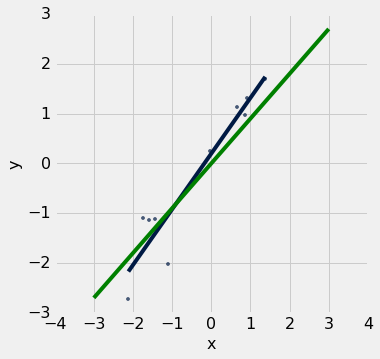

In [9]:
compare(0.9, 10)

## Prediction

In [10]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


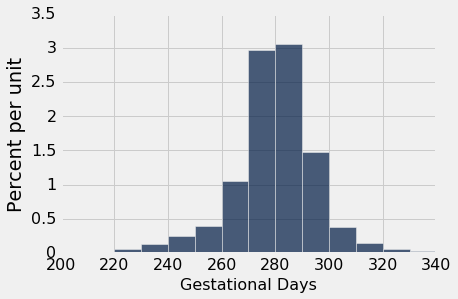

In [35]:
baby.hist(1, bins=np.arange(200, 350, 10))

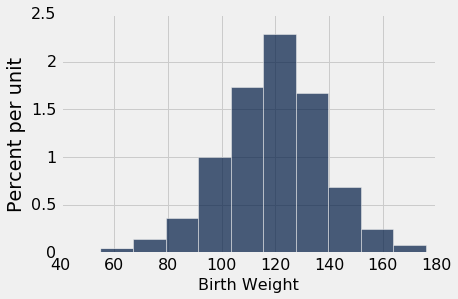

In [12]:
baby.hist(0)

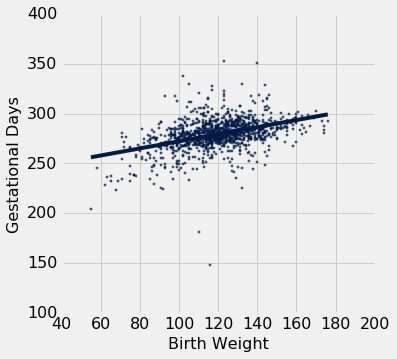

In [13]:
baby.scatter(0, 1, fit_line=True, s=5)

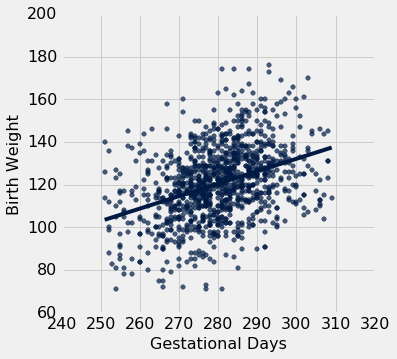

In [14]:
days = baby.column(1)
typical = baby.where(np.logical_and(days > 250, days < 310))
typical.scatter(1, 0, fit_line=True)

In [15]:
correlation(typical, 0, 1)

0.370409018701224

In [16]:
slope(typical, 1, 0)

0.58376165327561391

In [17]:
a = slope(typical, 1, 0)
b = intercept(typical, 1, 0)
a * 290 + b

126.34442889269195

In [18]:
def predict(t, x, y, new_x_value):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * new_x_value + b
predict(typical, 1, 0, 290)

126.34442889269195

## Variability in predictions

In [19]:
typical.num_rows

1090

In [20]:
sample_size = 100
predict(typical.sample(sample_size), 1, 0, 290)

126.39393135695674

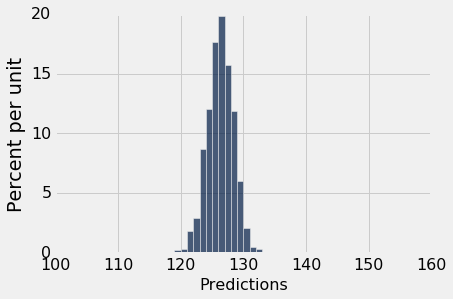

In [21]:
def sample_predict(new_x_value):
    predictions = Table(['Predictions'])
    for i in np.arange(1000):
        predicted = predict(typical.sample(sample_size), 1, 0, new_x_value)
        predictions.append([predicted])
    predictions.hist(0, bins=np.arange(100, 160))
sample_predict(290)

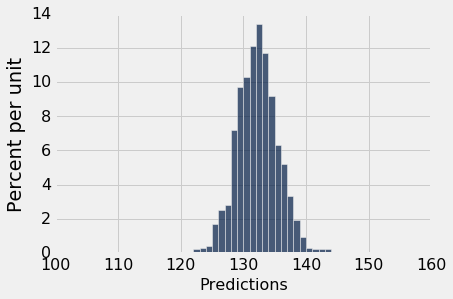

In [22]:
sample_predict(300)

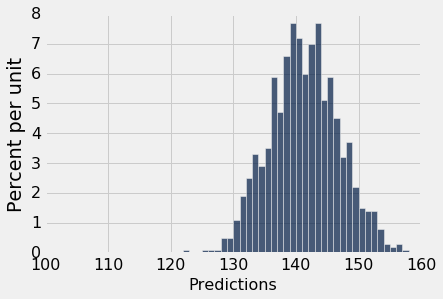

In [23]:
sample_predict(315)

## Errors

In [24]:
little_women = Table.read_table('little_women.csv')
little_women.show(3)

Characters,Periods
21759,189
22148,188
20558,231


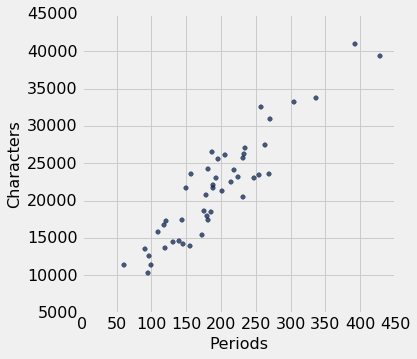

In [25]:
little_women.scatter('Periods', 'Characters')

In [26]:
correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

In [27]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(a, b):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plt.plot(xlims, a * xlims + b, lw=2)
    for x, y in sample:
        plt.plot([x, x], [y, a * x + b], color='r', lw=2)

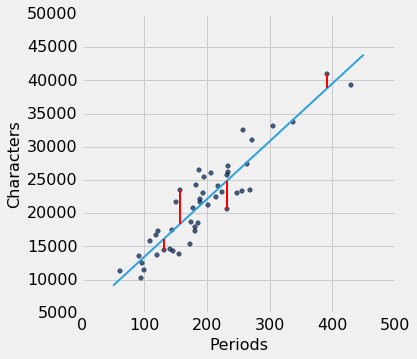

In [28]:
a = slope(little_women, 'Periods', 'Characters')
b = intercept(little_women, 'Periods', 'Characters')
lw_errors(a, b)

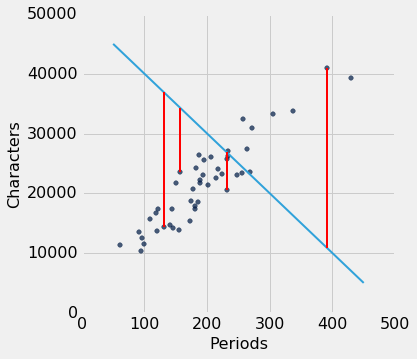

In [29]:
lw_errors(-100, 50000)

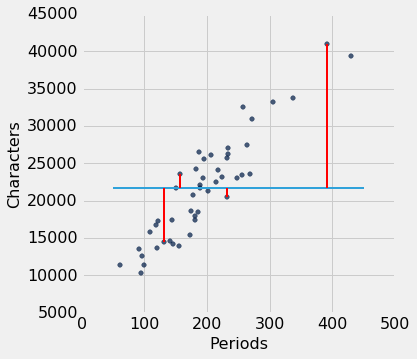

In [30]:
lw_errors(0, np.mean(little_women.column('Characters')))

In [31]:
def lw_rmse(a, b):
    lw_errors(a, b)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    estimate = a * x + b
    return np.average((y - estimate) ** 2) ** 0.5

7019.1759340480321

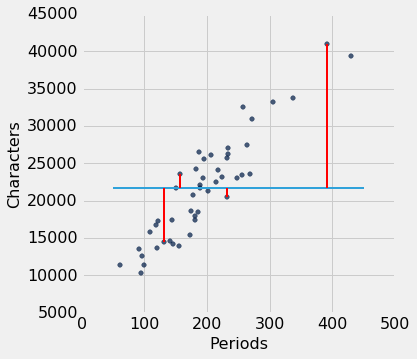

In [32]:
lw_rmse(0, np.mean(little_women.column('Characters')))

2701.690785311856

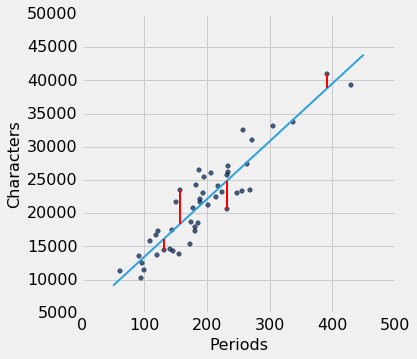

In [33]:
lw_rmse(a, b)